In [1]:
from STMiner.Simulate import Simulator 
from STMiner.SPFinder import SPFinder

sp = SPFinder()
sp.read_h5ad(file='I://zebrafish/10X_Visium_hunter2021spatially_sample_C_data.h5ad')

In [ ]:
import hotspot

In [ ]:
from STMiner.Algorithm.distance import get_exp_array

# 'sgk1' is normal
arr_li = []
for i in ['pax3a', 'mbpa', 'tnnt2a', 'ponzr4', 'pvalb2', 'rpl13', 'rpl22']:
    arr_li.append(get_exp_array(sp.adata, i))

sim = Simulator(arr_li)

In [ ]:
sp.plot.plot_gene('pvalb2', rotate=True, reverse_x=True,figsize=(6,6),save_path='./', spot_size=20)

In [ ]:
sim.set_noise_type(noise_type='undersampling', noise_argument=0.1)
a = sim.generate(offset_radius=3, count=100, add_noise=False, offset_probability=0.1)

In [ ]:
sp.set_adata(a)

In [ ]:
import scanpy as sc
a = sc.read_h5ad('I://zebrafish/10X_Visium_hunter2021spatially_sample_C_data.h5ad')
sc.pp.filter_genes(a, min_cells=200)
sc.pp.calculate_qc_metrics(a, inplace=True)
sc.tl.pca(a, svd_solver='arpack')

In [ ]:
# %%
hs = hotspot.Hotspot(
    a,
    model='danb',
    latent_obsm_key="X_pca",
    umi_counts_obs_key="total_counts"
)

In [ ]:
hs.create_knn_graph(weighted_graph=False, n_neighbors=50)

hs_results = hs.compute_autocorrelations()

In [ ]:
hs_results[:2000]

In [193]:
import pandas as pd

hk = pd.read_csv("C://Users/dell/Downloads/Housekeeping_GenesHuman.csv", sep=";")
hk['Gene.name']

0         ARF5
1         M6PR
2         RALA
3         DVL2
4       RHBDD2
         ...  
2828      CUTA
2829      WDR6
2830     FKBP8
2831     FBXW2
2832    CHMP4A
Name: Gene.name, Length: 2833, dtype: object

In [ ]:
uppercase_list = [element.upper() for element in list(a.var.index)]
uppercase_list

In [ ]:
hk_list = []
for i in uppercase_list:
    if i in list(hk['Gene.name']):
        hk_list.append(i)

In [198]:
len(hk_list)/len(hs_results.FDR.index)

0.17933567550303417

In [197]:
hs_results.FDR.index

Index(['pvalb2', 'myha', 'si:dkey-153m14.1', 'pvalb1', 'zgc:158463', 'atp2a1l',
       'tnni2a.3', 'TPM1', 'myhc4', 'ba1',
       ...
       'maml3', 'gcat', 'scyl1', 'drap1', 'si:dkey-24l11.2', 'stk11',
       'ENSDARG00000061023', 'csnk2a2a', 'snap29', 'relb'],
      dtype='object', name='Gene', length=6262)

In [159]:
hs_results[:5000].index

Index(['pvalb2', 'myha', 'si:dkey-153m14.1', 'pvalb1', 'zgc:158463', 'atp2a1l',
       'tnni2a.3', 'TPM1', 'myhc4', 'ba1',
       ...
       'zgc:100829', 'sgtb', 'ctsd', 'htra1a', 'si:ch211-106e7.2', 'mtss1lb',
       'eif4bb', 'tpte', 'rpl7l1', 'zgc:63863'],
      dtype='object', name='Gene', length=2000)

In [234]:
hs_genes = hs_results[:5500].index
n = 0
hs_genes_uppercase_list = [element.upper() for element in hs_genes]
for i in list(hs_genes_uppercase_list):
    if i in hk_list:
        n += 1
        print(n)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
from STMiner import SPFinder

sp = SPFinder()
sp.read_h5ad(file='I://zebrafish/10X_Visium_hunter2021spatially_sample_C_data.h5ad', bin_size=1)
sp.get_genes_csr_array(min_cells=200, log1p=False)
sp.spatial_high_variable_genes()

In [233]:
stminer_genes_uppercase_list = [element.upper() for element in list(sp.global_distance[:5500]['Gene'])]
n = 0
for i in list(stminer_genes_uppercase_list):
    if i in hk_list:
        n += 1
        print(n)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


Text(0.5, 1.0, 'Percentage of house-keeping genes')

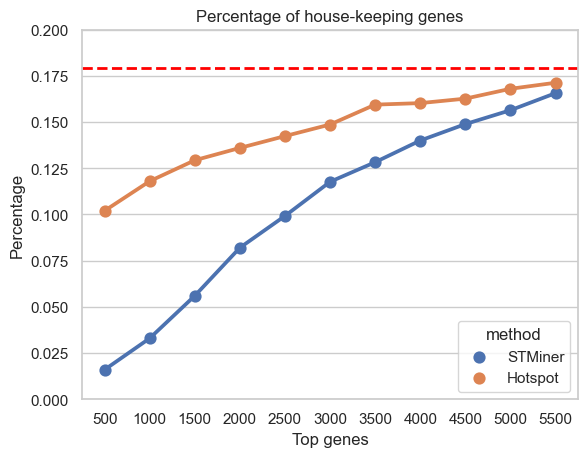

In [235]:
import seaborn as sns
import matplotlib.pyplot as plt

d = {'method': ['STMiner', 'STMiner', 'STMiner', 'STMiner', 'STMiner', 'STMiner', 'STMiner', 'STMiner', 'STMiner',
                'STMiner', 'STMiner',
                'Hotspot', 'Hotspot', 'Hotspot', 'Hotspot', 'Hotspot', 'Hotspot', 'Hotspot', 'Hotspot', 'Hotspot',
                'Hotspot', 'Hotspot', ],
     'Percentage': [8 / 500, 33 / 1000, 84 / 1500, 164 / 2000, 248 / 2500, 353 / 3000, 449 / 3500, 560 / 4000,
                    670 / 4500, 782 / 5000, 911 / 5500,
                    51 / 500, 118 / 1000, 194 / 1500, 272 / 2000, 356 / 2500, 446 / 3000, 558 / 3500, 641 / 4000,
                    732 / 4500, 840 / 5000, 942 / 5500],
     'Top genes': [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500,
                   500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500]}
df = pd.DataFrame(d)

sns.pointplot(df, x='Top genes', y='Percentage', hue='method')
plt.axhline(y=0.179, color='red', linestyle='--', linewidth=2, label='Horizontal Line')
plt.ylim(0, 0.2)
plt.title('Percentage of house-keeping genes')

In [217]:

d = {'method': ['STMiner', 'STMiner', 'STMiner', 'STMiner', 'STMiner', 'STMiner',
                'Hotspot', 'Hotspot', 'Hotspot', 'Hotspot', 'Hotspot', 'Hotspot', ],
     'Percentage': [8 / 500, 33 / 1000, 164 / 2000, 353 / 3000, 560 / 4000, 782 / 5000,
                    51 / 500, 118 / 1000, 272 / 2000, 446 / 3000, 641 / 4000, 840 / 5000],
     'Top genes': [500, 1000, 2000, 3000, 4000, 5000,
                   500, 1000, 2000, 3000, 4000, 5000]}
df = pd.DataFrame(d)
df

,method,Percentage,Top genes
0,STMiner,0.016000,500
1,STMiner,0.033000,1000
2,STMiner,0.082000,2000
3,STMiner,0.117667,3000
4,STMiner,0.140000,4000
5,STMiner,0.156400,5000
6,Hotspot,0.102000,500
7,Hotspot,0.118000,1000
8,Hotspot,0.136000,2000
9,Hotspot,0.148667,3000


In [ ]:
33/1000 

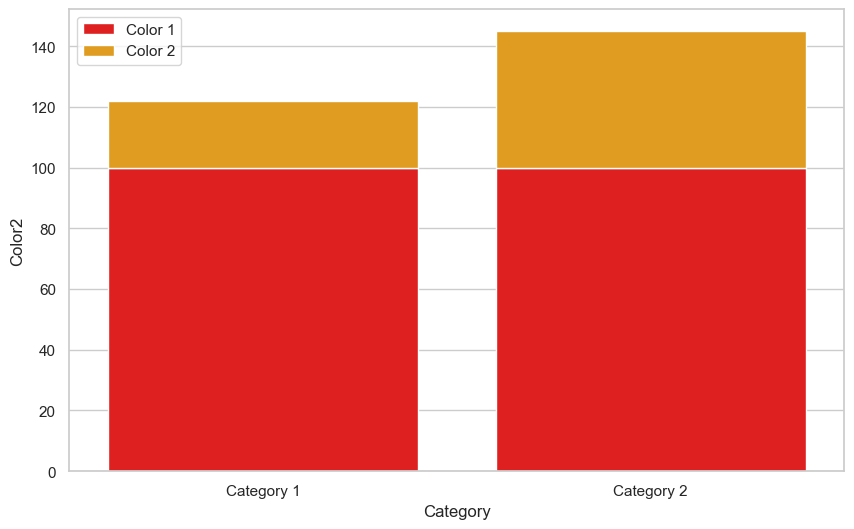

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

# 创建数据
data = {'Category': ['Category 1', 'Category 2'],
        'Color1': [100, 100],
        'Color2': [22, 45]}

# 转换为DataFrame
df = pd.DataFrame(data)

# 绘制柱状图
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# 使用seaborn.barplot绘制柱状图
sns.barplot(x='Category', y='Color1', data=df, color='red', label='Color 1')
sns.barplot(x='Category', y='Color2', data=df, color='orange', label='Color 2', bottom=df['Color1'])

# 显示图例
plt.legend()

# 显示图形
plt.show()


In [ ]:
pd.DataFrame(sp.adata.var['gene_ids']).to_csv('gene_list.csv')

In [ ]:
sp.adata.var['gene_ids']

In [ ]:
hs_genes = hs_results.loc[hs_results.FDR < 0.05].index  # Select genes

local_correlations = hs.compute_local_correlations(hs_genes, jobs=1)  # jobs for parallelization

# %%
modules = hs.create_modules(
    min_gene_threshold=30, core_only=True, fdr_threshold=0.05
)
module_scores = hs.calculate_module_scores()

# %%
module_scores
# %%
hs.plot_local_correlations()

In [ ]:
import numpy as np
from scipy.sparse import csr_matrix
import seaborn as sns

data = np.array(sp.adata.X.sum(axis=1)).flatten()
row_indices = np.array(sp.adata.obs['x'].values).flatten()
column_indices = np.array(sp.adata.obs['y'].values).flatten()
global_matrix = csr_matrix((data, (row_indices, column_indices)))

sns.scatterplot(x=global_matrix.nonzero()[1],
                y=global_matrix.nonzero()[0],
                c=global_matrix.data,
                s=20,
                edgecolor='none',
                cmap='Spectral_r')

In [ ]:
sp.get_genes_csr_array(min_cells=100, log1p=False)
sp.spatial_high_variable_genes()

In [ ]:
sp.fit_pattern(n_top_genes=-1, n_comp=20,min_cells=0)
sp.build_distance_array()

In [ ]:
sp.adata.obs

In [ ]:
import pandas as pd
df = pd.DataFrame(data=sp.adata.X, columns=sp.adata.var.index,index=[f"{x[0]}x{x[1]}" for x in [pair for pair in list(sp.adata.obs['cell_id'])]]).T
df.to_csv('spark_test.csv')

In [ ]:
[f"{x[0]}x{x[1]}" for x in [pair for pair in list(sp.adata.obs['cell_id'])]]

In [ ]:
sp.build_distance_array(method='mse')

In [ ]:
sp.cluster_gene(n_clusters=7, mds_components=20)

In [ ]:
sp.plot.plot_pattern(vmax=99)

In [ ]:
sp.plot.plot_genes(label=1, vmax=99)

In [ ]:
sp.plot.plot_tsne()

In [ ]:
sp.genes_labels

In [ ]:
sp2 = SPFinder(adata=a)
sp2.plot.plot_gene('gene_6_7')
import seaborn as sns
sns.heatmap(get_exp_array(a, 'gene_6_7'))

In [ ]:
li = sim.generate(offset_radius=5, count=5, add_noise=False, offset_probability=0.6)

In [ ]:
from scipy.sparse import csr_matrix
import seaborn as sns
import numpy as np


arr = li[4]
arr = np.maximum(arr - np.mean(arr[arr != 0]), 0)
sparse_matrix = csr_matrix(arr)
sns.scatterplot(x=sparse_matrix.nonzero()[1],
                y=sparse_matrix.nonzero()[0],
                c=sparse_matrix.data,
                cmap='viridis')

In [ ]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('I://SVG_test.csv',header=None)

In [ ]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('I://spark_test.csv',header=None)

In [ ]:
df['pattern'] = df[1].apply(lambda x: x.split('_')[1])


In [ ]:
import numpy as np
sns.histplot(df[2])

In [ ]:
import matplotlib.pyplot as plt
sns.barplot(df,x='pattern',y=2, order=['P0','P1','P2','P3','P4','P5','P6'])
plt.ylabel('Spatial Variance level')

In [ ]:
class p3DPlotter(plotterBase):
    def __init__(self, initSource, initTyp, colorList, ltrParaFile, speIdSet=None):
        super().__init__(initSource, initTyp, colorList, ltrParaFile, speIdSet)
        self.init_3DRela()

    def init_3DRela(self):
        self._3D_maxTypNum = len(self.colorList)

    def transTypList2plotColorList(self, typList):
        plotColorList = []
        for typ in typList:
            if typ == 0:
                plotColorList.append('#cdcdcd')
            else:
                plotColorList.append(self.colorList[typ - 1])
        return plotColorList

    def getLegendElementList(self, typId2annot):
        legendElementList = []
        for typ in typId2annot:
            if typ == 0:
                continue
            legendElementList.append(Line2D([], [],
                                            marker='.',
                                            color=self.colorList[typ - 1],
                                            label=typId2annot[typ],
                                            markersize=25,
                                            markeredgewidth=0,
                                            linestyle='None'))
        return legendElementList

    def plot(self, adata, typList, typId2annot, outGif, plotText=True, plotTree=True):
        # adata is the loaded adata of LTR_Stream.
        # typList should be at range [0, _3D_maxTypNum]
        # 0 for grey color.
        self.checkTypeList(lowestId=0,
                           highestId=self._3D_maxTypNum,
                           typList=typList)
        plotColorList = self.transTypList2plotColorList(typList)
        legendElementList = self.getLegendElementList(typId2annot)
        comp1, comp2, comp3 = 0, 1, 2
        df_plot = pd.DataFrame(index=adata.obs.index,
                               data=adata.obsm['X_dr'],
                               columns=['Dim' + str(x + 1) for x in range(adata.obsm['X_dr'].shape[1])])
        epg = adata.uns['epg']
        flat_tree = adata.uns['flat_tree']
      